# Lesson 3: State Space

This notebook is designed to run in Google Colab or local Jupyter.

**Colab steps:** Open the notebook, run the setup cell below, then run cells top-to-bottom.

## Learning Objectives
- Form the state-space representation of the linearized system.
- Analyze stability for upward and downward equilibria.
- Interpret eigenvalues in terms of system behavior.

### Parameters (update as needed)
| Symbol | Meaning | Example |
| --- | --- | --- |
| m_c | Cart mass | 0.5 kg |
| m_p | Pendulum mass | 0.2 kg |
| l | Pendulum length | 0.3 m |
| g | Gravity | 9.81 m/s^2 |
| dt | Sample time | 0.01 s |

---
## Lesson Content

In [1]:
# Install required packages (Colab)
!pip -q install numpy scipy matplotlib


## Predict before simulate
Pick three different A matrices and classify stability from eigenvalues.

For each matrix:
- Predict the trajectory shape (spiral, node, saddle).
- Simulate and compare to your prediction.

Deliverable: a "predict -> simulate -> explain" table.


###Linearizing at upward position:
The equilibrium is $X =  \begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
0 \\
0 \\
0 \\
0
\end{bmatrix}
$

By ignoring second order terms,

$$
\dot{X} =
\begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
\dot{x} \\
{\frac{f-m_p \theta g}{m_c}} \\
\dot{\theta} \\
{\frac{-f + (m_c + m_p) g \theta}{L m_c}}
\end{bmatrix} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & -\frac{m_p g}{m_c} & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & \frac{(m_c + m_p) g}{L m_c} & 0
\end{bmatrix}
\begin{bmatrix}
{x} \\
{v} \\
{\theta} \\
{\omega}
\end{bmatrix} +
\begin{bmatrix}
{0} \\
{\frac{1}{m_c}} \\
{0} \\
{\frac{1}{L m_c}}
\end{bmatrix}
f
$$


###Linearizing at downward position:
The equilibrium is $X =  \begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
0 \\
0 \\
\pi \\
0
\end{bmatrix}
$

Define $ \theta' = \theta - \pi $,

so $\sin\theta = \sin(\theta' + \pi) $ and $ \cos \theta = \cos (\theta' + \pi) = -1$

Ignoring second order terms, and writing $\theta'$ as $\theta$ for simplicity

$$
\dot{X} =
\begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
\dot{x} \\
{\frac{f-m_p \theta g}{m_c}} \\
\dot{\theta} \\
{\frac{-f + (m_c + m_p) g \theta}{L m_c}}
\end{bmatrix} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & -\frac{m_p g}{m_c} & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & -\frac{(m_c + m_p) g}{L m_c} & 0
\end{bmatrix}
\begin{bmatrix}
{x} \\
{v} \\
{\theta} \\
{\omega}
\end{bmatrix} +
\begin{bmatrix}
{0} \\
{\frac{1}{m_c}} \\
{0} \\
{\frac{1}{L m_c}}
\end{bmatrix}
f
$$

## State Space of Linearized Pendulum at Upward Position

$$
\dot{X} =
\begin{bmatrix}
\dot{x} \\
\dot{v} \\
\dot{\theta} \\
\dot{\omega}
\end{bmatrix} =
\begin{bmatrix}
\dot{x} \\
{\frac{f-m_p \theta g}{m_c}} \\
\dot{\theta} \\
{\frac{-f + (m_c + m_p) g \theta}{L m_c}}
\end{bmatrix} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & -\frac{m_p g}{m_c} & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & \frac{(m_c + m_p) g}{L m_c} & 0
\end{bmatrix}
\begin{bmatrix}
{x} \\
{v} \\
{\theta} \\
{\omega}
\end{bmatrix} +
\begin{bmatrix}
{0} \\
{\frac{1}{m_c}} \\
{0} \\
{\frac{1}{L m_c}}
\end{bmatrix}
f
$$


So,

$$
A = \begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & -\frac{m_p g}{m_c} & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & \frac{(m_c + m_p) g}{L m_c} & 0
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
{0} \\
{\frac{1}{m_c}} \\
{0} \\
{\frac{1}{L m_c}}
\end{bmatrix}
$$

Assuming we can measure all states:

$$
y = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
{x} \\
{v} \\
{\theta} \\
{\omega}
\end{bmatrix}
+0
$$

where
$$
C = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
D = 0
$$

## **Task:** Determine the Stability of the Upward and Down System when $f = 0$ (15 mins)

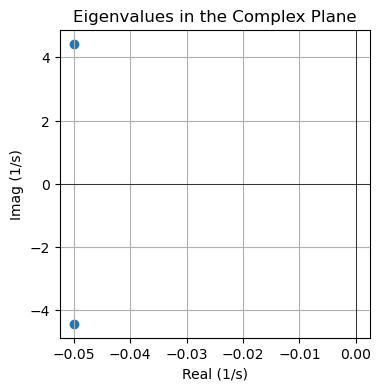

In [2]:
# Plot eigenvalues on the complex plane (example)
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
L = 0.5
A = np.array([[0, 1], [-(g / L), -0.1]])
eigvals = np.linalg.eigvals(A)

plt.figure(figsize=(4, 4))
plt.scatter(np.real(eigvals), np.imag(eigvals), c='tab:blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Eigenvalues in the Complex Plane')
plt.xlabel('Real (1/s)')
plt.ylabel('Imag (1/s)')
plt.grid(True)
plt.show()


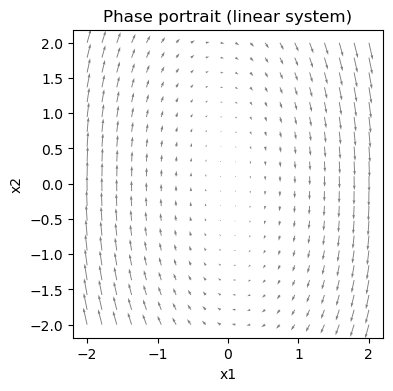

In [3]:
# Phase portrait helper for a 2x2 linear system
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0, 1], [-4.0, -0.4]])  # replace with your A matrix
x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(-2, 2, 20)
X1, X2 = np.meshgrid(x1, x2)

U = A[0, 0] * X1 + A[0, 1] * X2
V = A[1, 0] * X1 + A[1, 1] * X2

plt.figure(figsize=(4, 4))
plt.quiver(X1, X2, U, V, color='tab:gray')
plt.title('Phase portrait (linear system)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()


**Expected output:**
- Eigenvalues appear as points on the complex plane; stable dynamics correspond to negative real parts.

## Prediction -> simulate -> explain
Choose one system with complex poles and one with a real unstable pole. Predict the motion, simulate, and explain discrepancies.


---
## Checkpoints
- State-space matrices have consistent dimensions.
- Stability conclusions align with eigenvalue locations.

## Common Pitfalls
- Confusing upward vs downward equilibrium definitions.
- Misinterpreting marginally stable eigenvalues.